In [25]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from math import e, pi, sin, cos
%matplotlib inline
from filter_optimizer.filterplot import plot_response, plot_delay, pole_zero_plot
from filter_optimizer.filterplot import default_upper_delay, default_lower_delay
from filter_optimizer.filterplot import default_upper_magnitude, default_lower_magnitude
from filter_optimizer.showfromlog import Experiment


In [26]:
def update_conjugate_complex (numbers) :
    """ Modify numbers in-place to add conjugate complex numbers"""
    n2 = [k.conjugate () for k in numbers if k.imag]
    numbers.extend (n2)

## First example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1423, plot page 1424

In [27]:
b0 = 0.015251585
zeros = [  1.40060806+0.52562938j
        ,  0.71218856+1.31038625j
        , -0.34154833+0.94477549j
        , -0.72080392+0.77084135j
        , -1.07931648+0.26358750j
        , -1.10339797+0.12036580j
        ]
poles = [ -0.55252815
        , -0.93489129+0.14881956j
        , -0.13041701+0.92361074j
        ,  0.10577534+0.70463643j
        ,  0.38840193+0.48449893j
        ,  0.56325419+0.17664608j
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [28]:
(b, a) = signal.zpk2tf (zeros, poles, b0)
w, h = signal.freqz (b, a)
wgd, gd = signal.group_delay ((b, a))

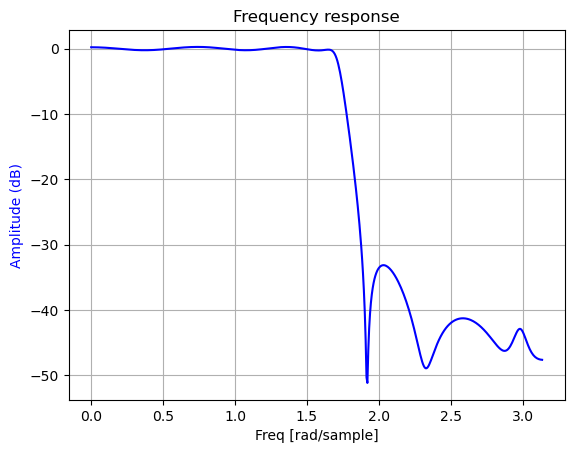

In [29]:
plot_response (w, h)

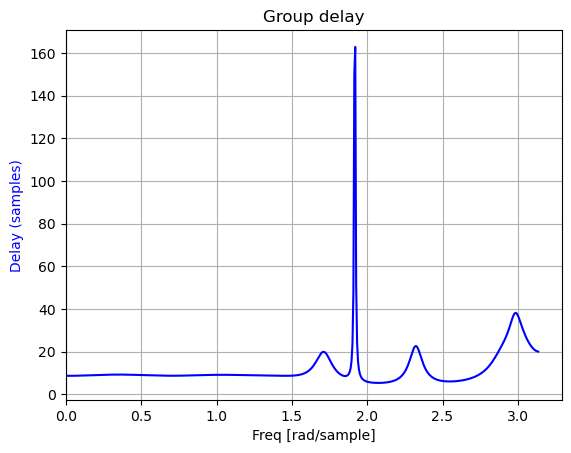

In [30]:
plot_delay (wgd, gd)

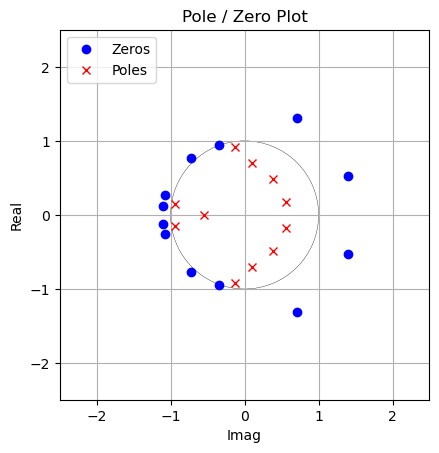

In [31]:
pole_zero_plot (poles, zeros)

## Second example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1425, plot on same page.


In [32]:
b0 = -0.00046047527
zeros = [ 18.63131093
        ,  1.49675301+0.48221524j
        ,  0.89762684+1.22910309j
        , -0.99895376+0.20015069j
        , -0.20222995+0.97998167j
        , -0.84535803+0.56243645j
        , -0.35458606+0.93926134j
        , -0.59858640+0.81318261j
        ]
poles = [  0.20628660
        ,  0.055677115+0.55763187j
        , -0.032471477+0.93555574j
        ,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [33]:
(b, a) = signal.zpk2tf (zeros, poles, b0)
w, h = signal.freqz (b, a)
wgd, gd = signal.group_delay ((b, a))

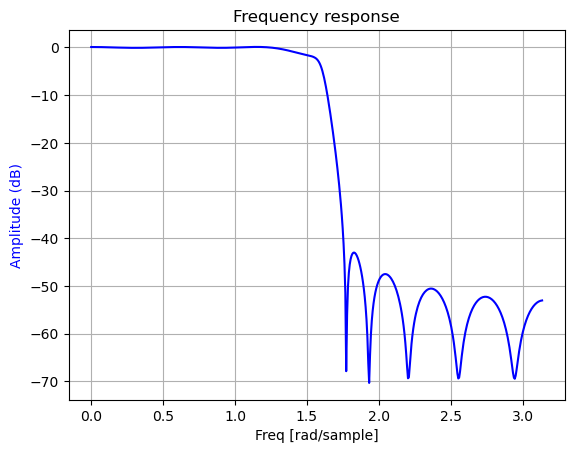

In [34]:
plot_response (w, h)

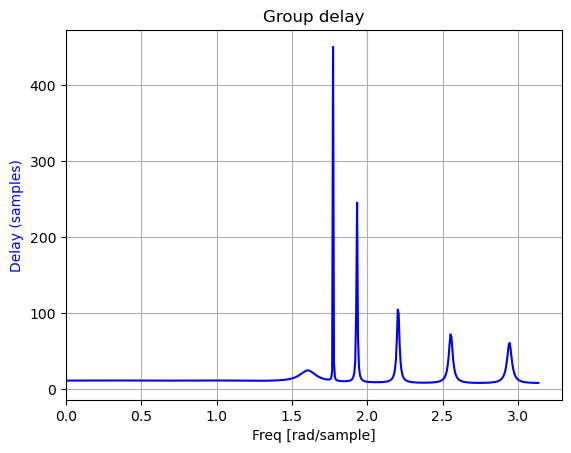

In [35]:
plot_delay (wgd, gd)

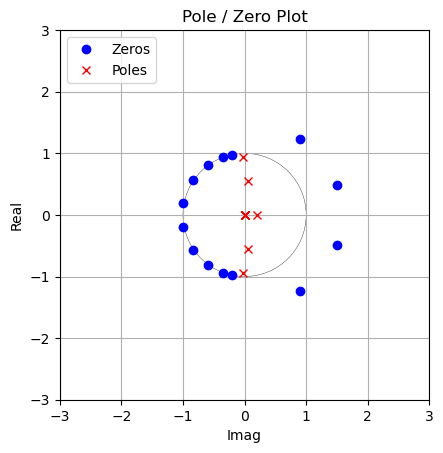

In [36]:
pole_zero_plot (poles, zeros, limit = 3)

## Third example ##
#### Taken from:

Rainer Storn. Differential evolution design of an IIR-filter with
requirements for magnitude and group delay. Technical Report
TR-95-026, International Computer Science Institute (ICSI), June
1995.

#### See also:

Rainer Storn. Differential evolution design of an IIR-filter. In
IEEE International Conference on Evolutionary Computation
(ICEC), pages 268–273, Nagoya, Japan, May 1996.

Note that the 4 given parameters are reflected to make 8 parameters for a 7th degree FIR filter with constant delay.

Also see the second computation below where we use *only* the first half of the filter. This is what happens when a factor of 2 is missing when using $\Omega$. See formula (8) in the paper and (13) in the tech report: In both cases in the first term (which is the FIR filter part) inside the cos the factor 2 is missing. This is then also used below in the example where we plot the combined FIR+IIR filter. Only due to the halved FIR filter is the result matching the result in the paper.

-0.033271
[ 3.0050775 +0.j         -0.6098894 +0.79248654j -0.6098894 -0.79248654j
 -1.        +0.j         -0.85683129+0.51559688j -0.85683129-0.51559688j
  0.33277012+0.j        ] []


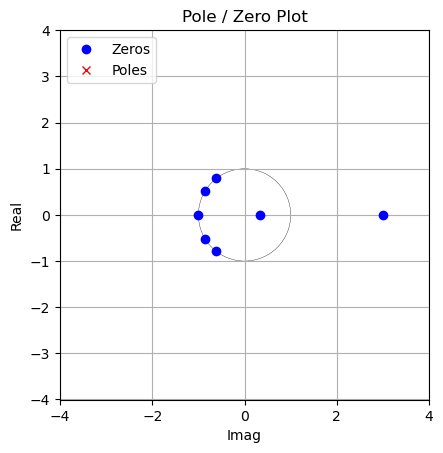

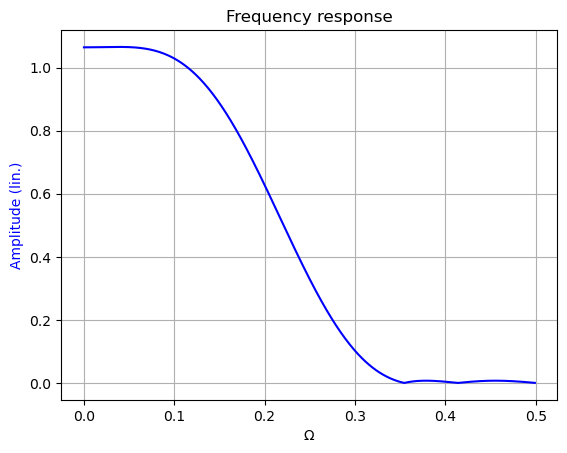

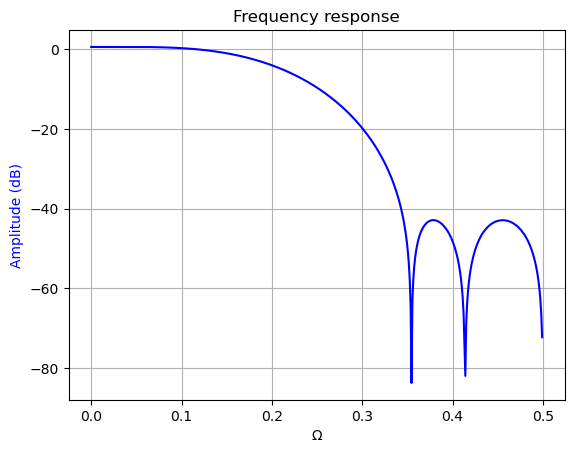

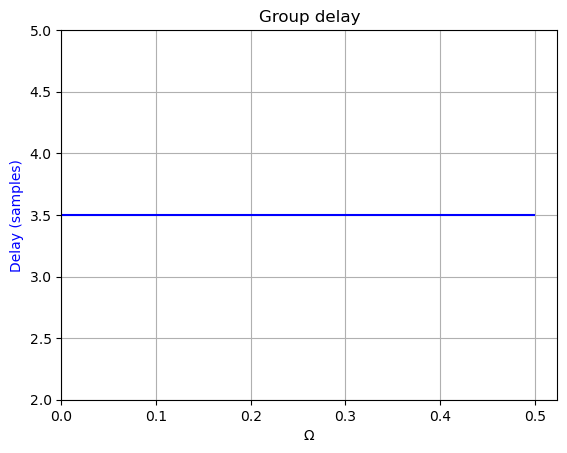

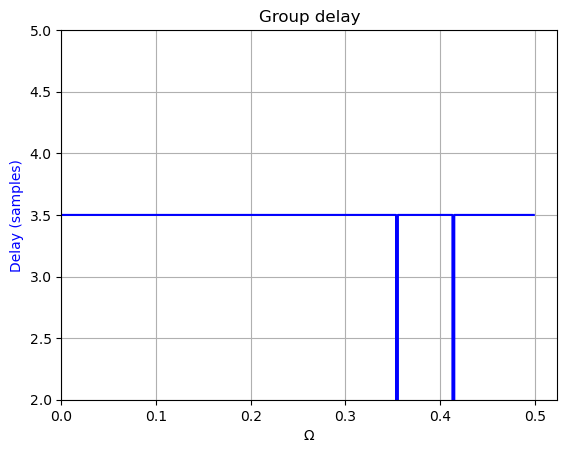

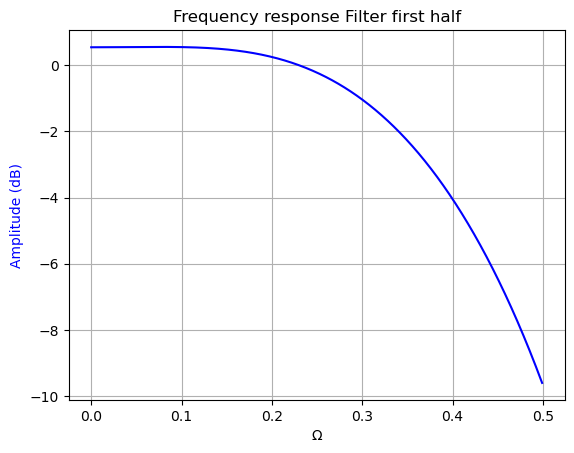

In [37]:
#fir = [-0.033271, -0.019816, 0.169865, 0.415454]
# Reverse-engineered FIR parameters, the commented list above is from the paper
# needed to find out that the parameters are re-used to make everything real.
# See accompanying maxima sheet.
fir = [-0.033271, -0.019816, 0.169865, 0.415454, 0.415454, 0.169865, -0.019816, -0.033271]

fir_zeros, fir_poles, fir_gain = signal.tf2zpk (fir, [1.0])
print (fir_gain)
print (fir_zeros, fir_poles)
fir_w, fir_h = signal.freqz (fir)
pole_zero_plot (fir_poles, fir_zeros)
plot_response (fir_w, fir_h, fs = 1.0, logy = False)
plot_response (fir_w, fir_h, fs = 1.0, logy = True)
fir_wgd, fir_gd = signal.group_delay ((fir, [1.0]))
plot_delay (fir_wgd, fir_gd, fs = 1.0, ymin = 2, ymax = 5)
zzz, H = signal.freqz (fir, [1.0], 513)
gd = -np.diff (np.unwrap (np.angle(H))) / np.diff (zzz)
plot_delay (fir_wgd, gd, fs = 1.0, ymin = 2, ymax = 5)

# And now with *halved* angles, seems in the technical report
# there is a factor 2 missing in the FIR parameters.
r = np.arange (0, 0.5, 0.5 / 512)
#print (r)
fir_w, fir_h = signal.freqz (fir, 1, r * np.pi)
fir_w = r * 2 * np.pi
#print (fir_w)
#print (fir_h)
plot_response (fir_w, fir_h, fs = 1.0, logy = True, title = 'Filter first half')

This is the frequency response of the Pre-Filter according to Storn technical report formula number (8) in the paper and (13) in the technical report (the part that belongs to the FIR filter). Note that phi is running from 0 to $\pi$ unlike Storn paper + technical report where it runs only to $\frac{\pi}{2}$.

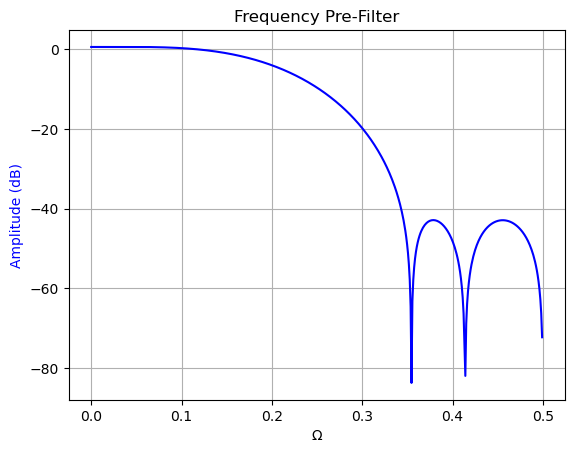

In [38]:
xa = []
ya = []
for i in  range (512):
    phi = i / 512. * pi
    xa.append (phi / pi / 2.0)
    y = 0.0
    for k in range (4):
        y += fir [k] * 2 * cos (phi * (k - 3.5))
    ya.append (abs (y))
fig = plt.figure ()
ax1 = fig.add_subplot (111)
plt.title ('Frequency Pre-Filter')
plt.plot (xa, 20 * np.log10 (ya), 'b')
plt.ylabel ('Amplitude (dB)', color = 'b')
plt.xlabel ('$\Omega$')

plt.grid ()
plt.axis ('tight')
plt.show ()

Parameters:
- The first 5 are the radii of the zeros, the next five the angles of the zeros.
- Then follow 4 radii of poles and 4 angles of poles.

Note that the angles are in $\omega / \omega_s$ so we multiply by $2*pi$ before exponentiation

In [39]:
a0_1 = 0.00390625
params = []
params.append \
 ([ 1.620493889,  1.006124616,  1.016987443,  2.498671532,   1.919012547
 ,  0.2243566662, 0.3745155931, 0.4304945767, 0.02474720217, 0.1109348238
 ,  0.6369678974, 0.4702593982, 0.408888042,   0.8722907901
 ,  0.2370584458, 0.125761658,  0.05192748457, 0.3109594584
 ])
a0_2 = 0.01
params.append \
 ([ 1.70534277,   1.019881606,  1.558364391,  1.001873851, 1.829733968
 ,  0.1320674717, 0.3776784241, 0.2309984416, 0.4321155548, 0.04620760679
 ,  0.8493334651, 0.3932341039,  0.6438843012, 0.5428563952
 ,  0.3089904487, 0.01219726913, 0.2359268814, 0.124328509
 ])

zeros = []
poles = []
for p in params :
    zeros.append ([p [k]    * np.e ** (2j * pi * p [k+5])  for k in range (5)])
    update_conjugate_complex (zeros [-1])
    poles.append ([p [k+10] * np.e ** (2j * pi * p [k+14]) for k in range (4)])
    update_conjugate_complex (poles [-1])

filter_bounds = [default_lower_delay, default_upper_delay]
bounds = [default_upper_magnitude, default_lower_magnitude]

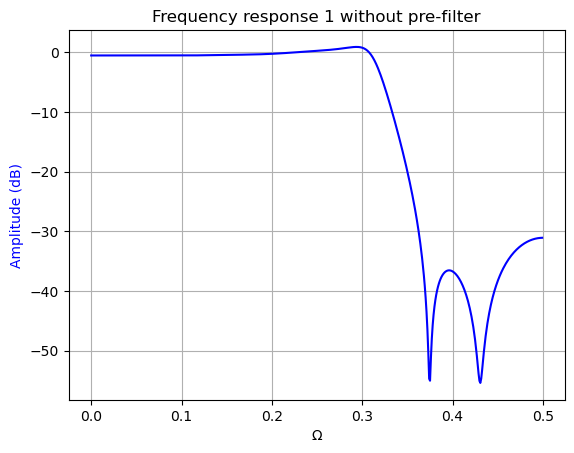

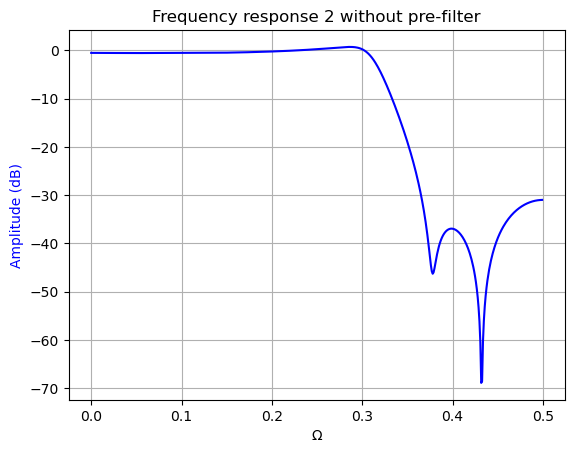

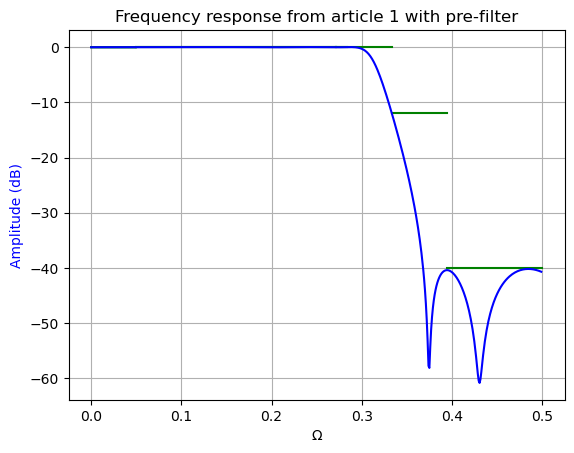

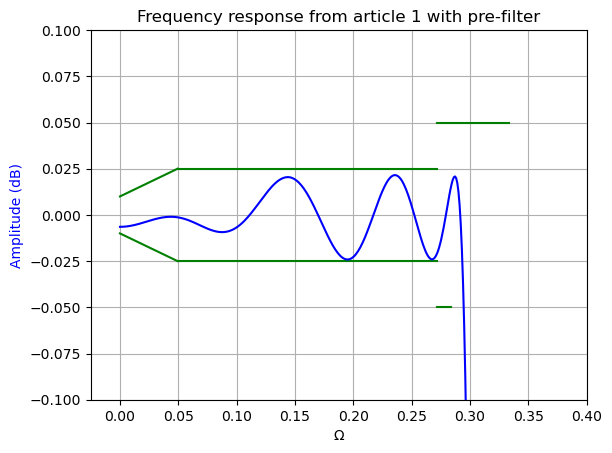

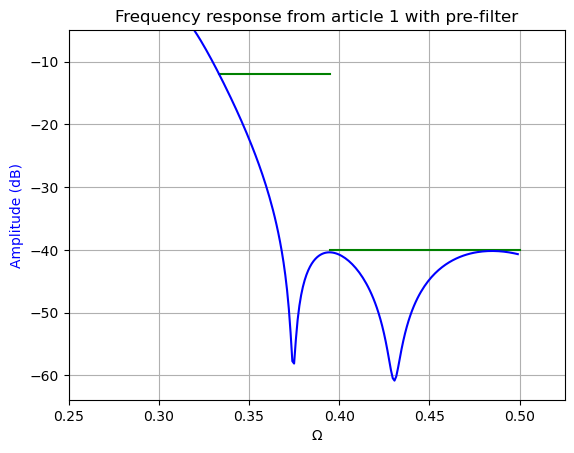

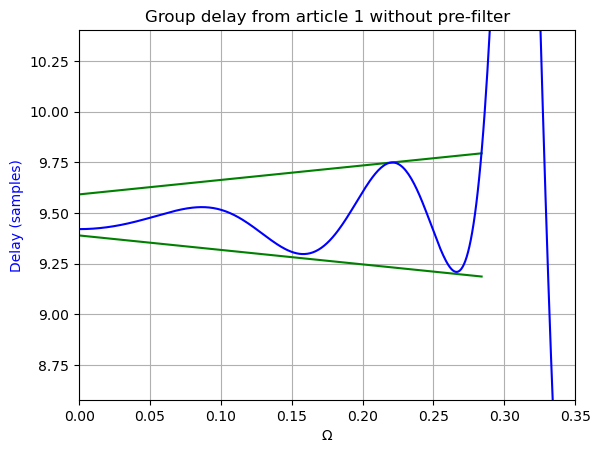

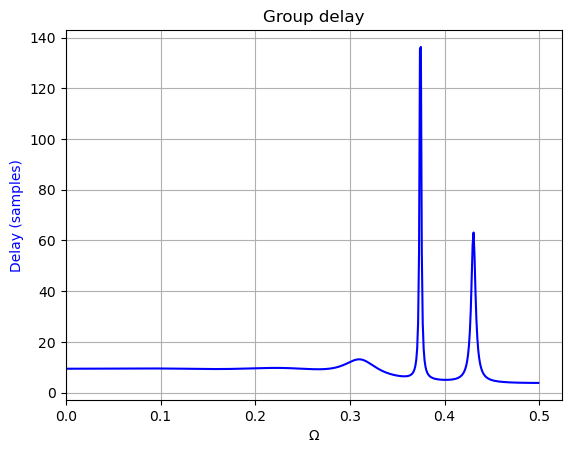

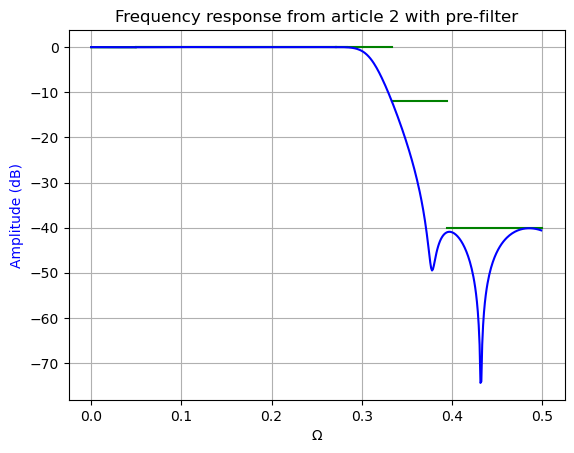

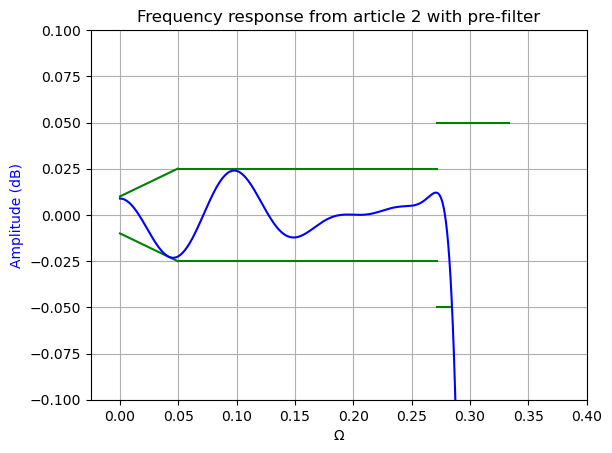

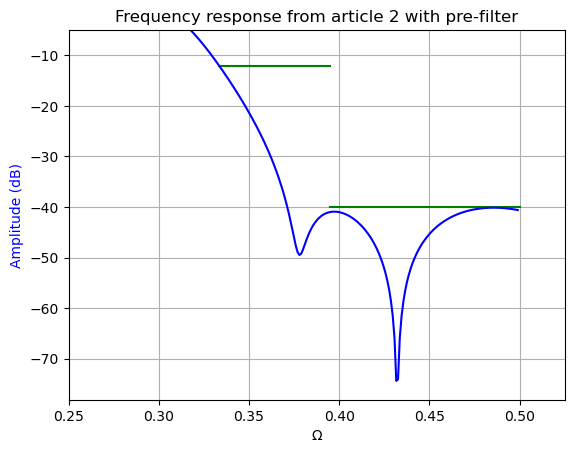

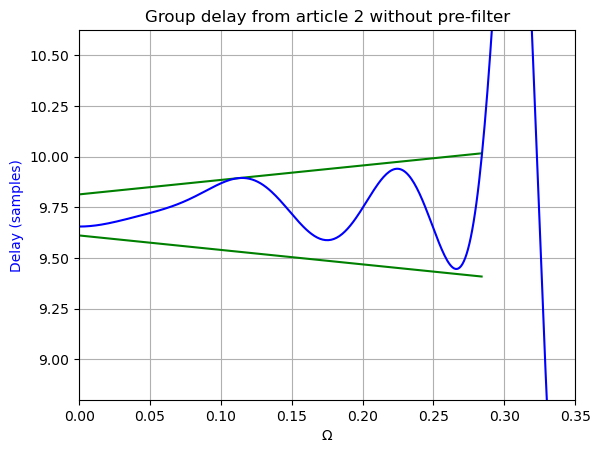

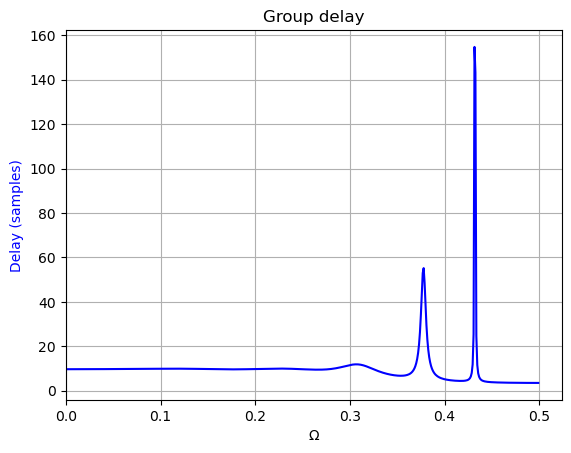

In [40]:
(b1, a1) = signal.zpk2tf (zeros [0], poles [0], a0_1)
w1, h1 = signal.freqz (b1, a1)
h1f = fir_h * h1
wgd1, gd1 = signal.group_delay ((b1, a1))
plot_response (w1, h1, title = '1 without pre-filter', fs = 1.0)

(b2, a2) = signal.zpk2tf (zeros [1], poles [1], a0_2)
w2, h2 = signal.freqz (b2, a2)
h2f = fir_h * h2
wgd2, gd2 = signal.group_delay ((b2, a2))
plot_response (w2, h2, title = '2 without pre-filter', fs = 1.0)

for idx in (0, 1) :
    a0 = a0_1
    if idx == 1 :
        a0 = a0_2
    (b4, a4) = signal.zpk2tf (zeros [idx], poles [idx], a0)
    w4, h4 = signal.freqz (b4, a4)
    # Note that we're using the halved fir filter from above.
    # Due to the error in the paper/tr this turns out to produce the
    # same filter as in the paper.
    # See computation of fir_h above.
    h4f = fir_h * h4
    wgd4, gd4 = signal.group_delay ((b4, a4))
    title = "from article %s with pre-filter" % (idx + 1)
    plot_response (w4, h4f, fs = 1.0, title = title, bounds = bounds)
    plot_response (w4, h4f, fs = 1.0, title = title, bounds = bounds, xmax = 0.4,  ymax = 0.1, ymin=-0.1)
    plot_response (w4, h4f, fs = 1.0, title = title, bounds = bounds, xmin = 0.25, ymax = -5)
    title = "from article %s without pre-filter" % (idx + 1)
    plot_delay (wgd4, gd4, fs = 1.0, title=title, bounds = filter_bounds, xmax = 0.35)
    plot_delay (wgd4, gd4, fs = 1.0)

## Own experiments ##

These are from my own experiments. Due to limited accuracy of the printed float numbers it may be slightly off.
Note that we're not faithfully reproducing the wrong FIR filter, we're using the real thing.

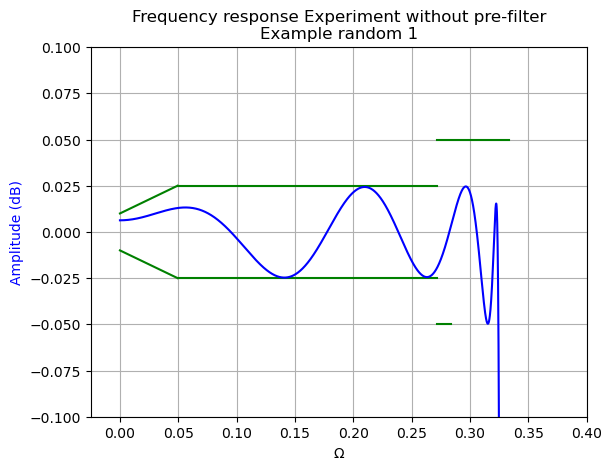

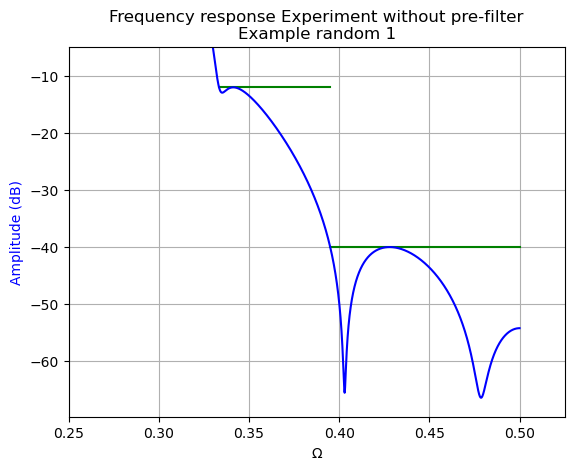

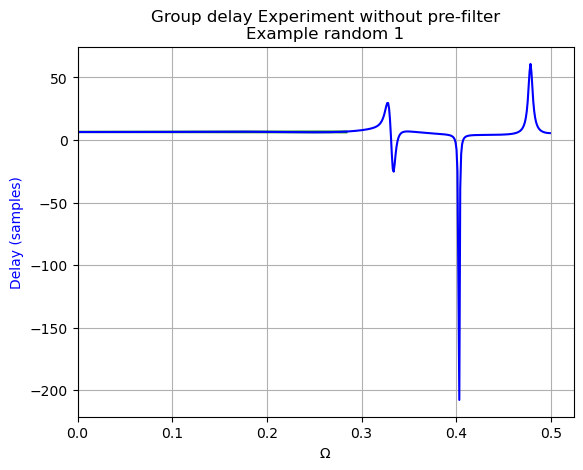

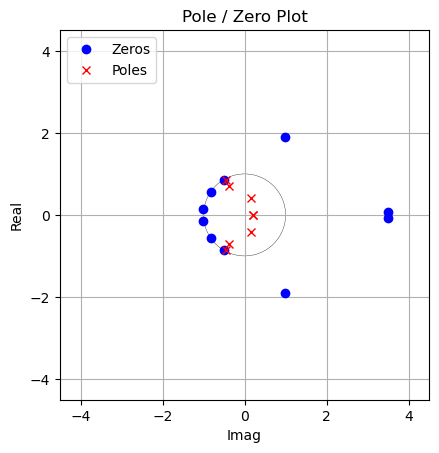

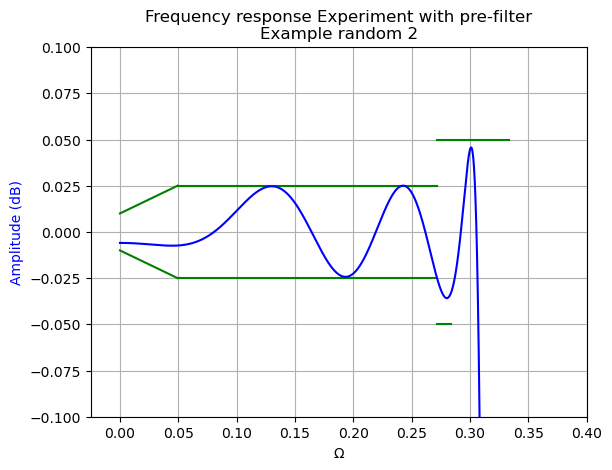

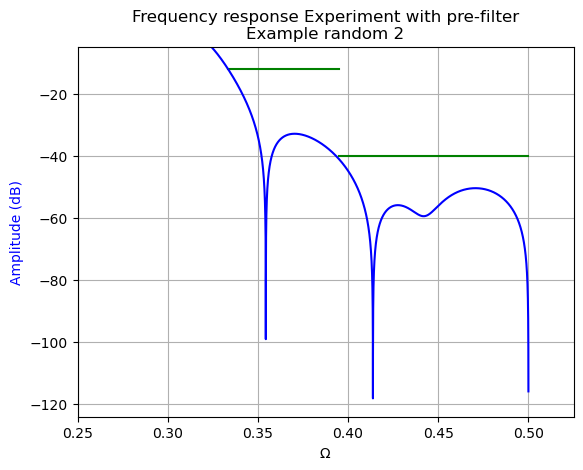

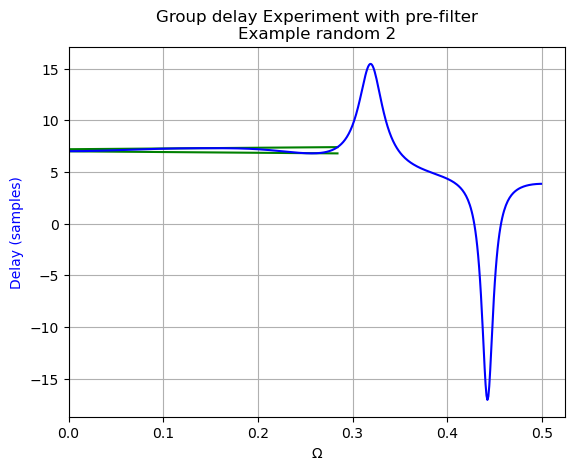

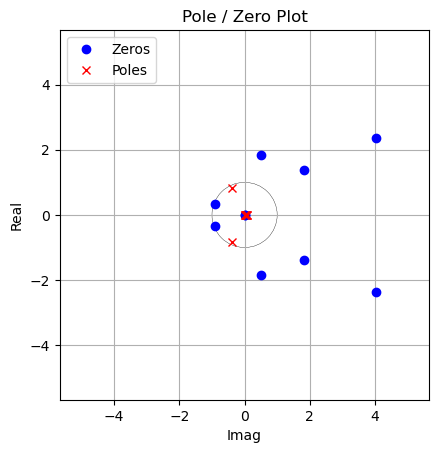

In [41]:
def parse_and_plot (t, title = None):
    t_iter = (l for l in t.split ('\n'))
    ex = Experiment.Parse (t_iter)
    if title:
        ex.title = title
    ex.display (fine = True)

t = """
The Best Evaluation: 0.000000e+00.
poles                : 4
zeros                : 5
gain                 : 0.00390625
random_seed          : 1
#   0: [   3.505616], [0.003024832], [  0.9804489], [   0.333362], [   1.017716]
#   5: [  0.4785008], [  0.9965875], [  0.4029854], [    2.13169], [  0.1744849]
#  10: [  0.4422338], [  0.1944673], [  0.8032487], [  0.3261729], [   0.210126]
#  15: [0.006368016], [  0.9717129], [  0.3287285]

"""

parse_and_plot (t, "Example random 1")

t = """
The Best Evaluation: 0.000000e+00.
poles                : 4
random_seed          : 2
zeros                : 5
gain                 : 0.00390625
use_prefilter        : True
#   0: [   2.280354], [  0.1038998], [  0.9548585], [  0.4424355], [0.003359473]
#   5: [ 0.04208716], [   1.898095], [   0.208396], [   4.669737], [ 0.08470043]
#  10: [    0.90715], [  0.3190976], [ 0.06446609], [ 0.01987387], [ 0.03477975]
#  15: [ 0.04596726], [0.002912085], [ 0.04292068]

"""

parse_and_plot (t, "Example random 2")


## Example 4: From DE Book ##
Kenneth V. Price, Rainer M. Storn, and Jouni A. Lampinen.
Differential Evolution: A Practical Approach to Global Optimization.
Springer, Berlin, Heidelberg, 2005.

Page 434 Table 7.12

(array([-1.1436981 +0.j        , -0.78186651+0.54873521j,
       -0.78186651-0.54873521j, -0.33471898+0.4283815j ,
       -0.33471898-0.4283815j ]), array([-0.29255553+0.83655009j, -0.29255553-0.83655009j,
        0.03949807+0.4715525j ,  0.03949807-0.4715525j ,
       -0.08275477+0.j        ]), 0.19881558418273926)


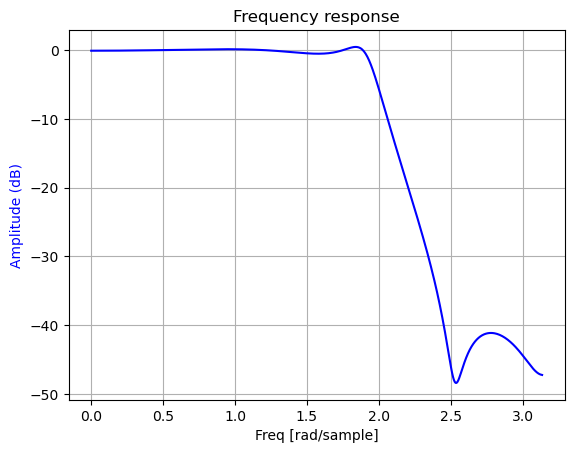

In [42]:
b = [ 0.19881558418273926
    , 0.6713742017745972 
    , 0.956078052520752  
    , 0.7260297536849976 
    , 0.29759085178375244
    , 0.0613178014755249 
    ]
a = [ 1.0
    , 0.5888696908950806
    , 1.0049885511398315
    , 0.14867675304412842
    , 0.18157732486724854
    , 0.014554023742675781
    ]
print (signal.tf2zpk (b, a))
w, h = signal.freqz (b, a)
wg, gd = signal.group_delay ((b, a))
plot_response (w, h)

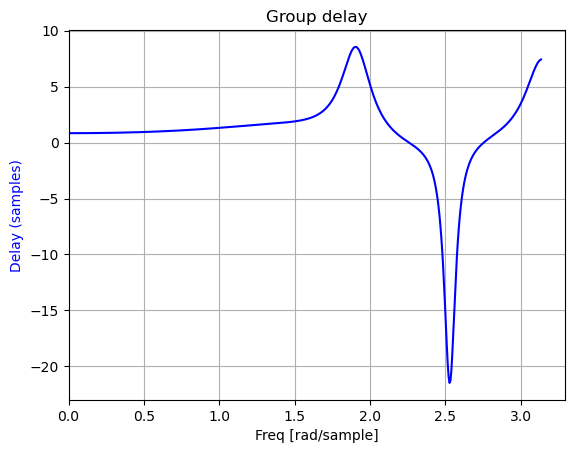

In [43]:
plot_delay (wg, gd)

## Moving Average filter ##
From
John G. Proakis and Dimitris G. Manolakis. Digital Signal
Processing: Principles, Algorithms, and Applications. Pearson,
Prentice Hall, Upper Saddle River, New Jersey, fourth edition, 2007.
p. 285

[-0.5+0.8660254j -0.5-0.8660254j] [] 0.3333333333333333
[1.0] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


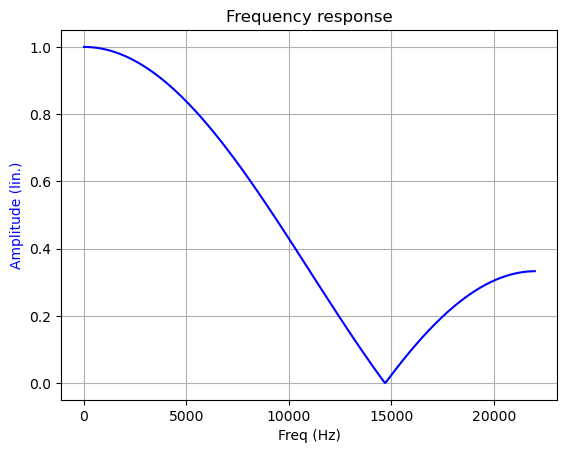

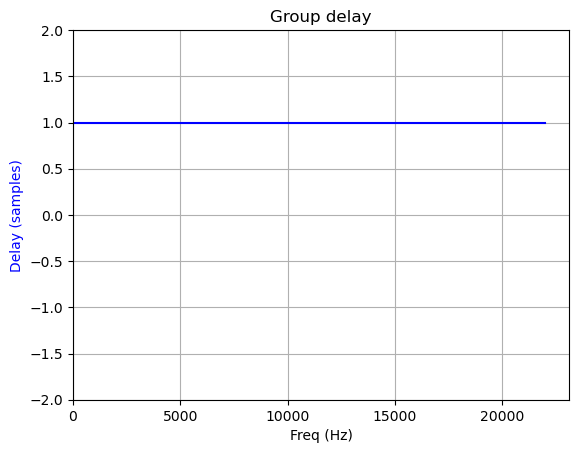

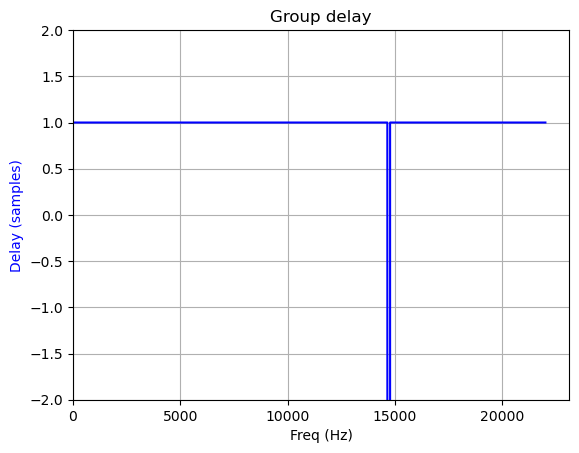

Delay !=1: [-84.49999999999764, -426.50000000000057]


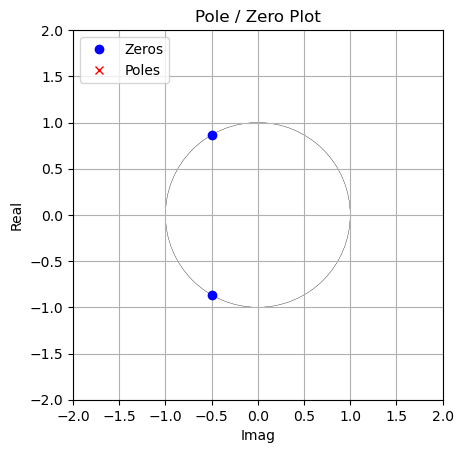

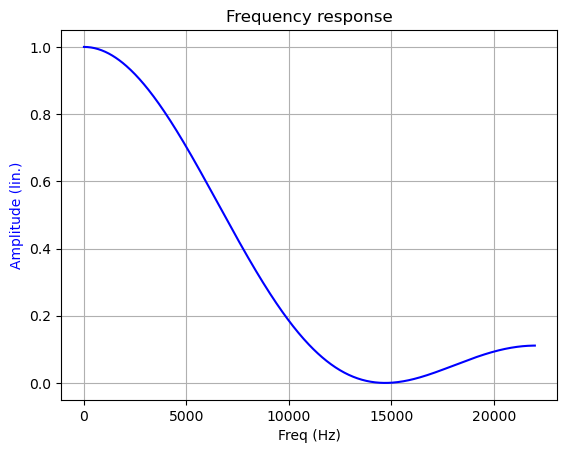

[0.11111111 0.22222222 0.33333333 0.22222222 0.11111111]


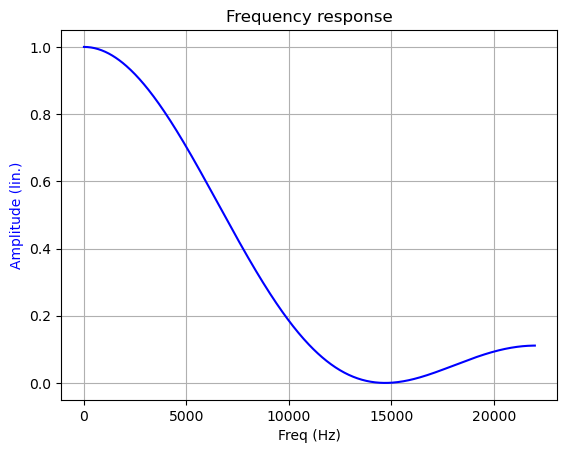

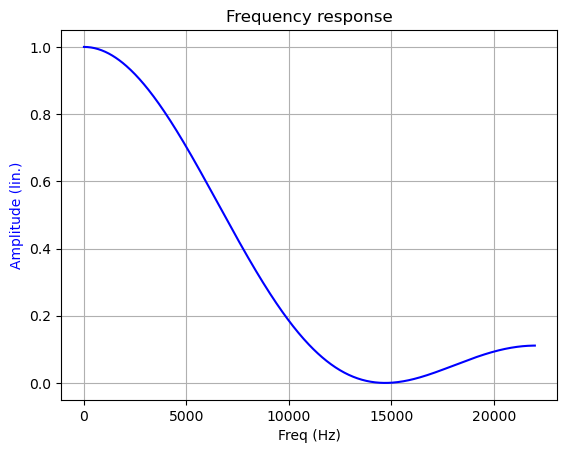

[0.11111111 0.22222222 0.33333333 0.22222222 0.11111111]


In [44]:
b = [1.0/3.0] * 3
a = [1.0]
z, p, g = signal.tf2zpk (b, a)
print (z, p, g)
print (a, b)
w, h = signal.freqz (b, a)
#x, y = signal.freqz (b, a, [k / 20. * pi for k in range (20)])
#print (np.angle (y))
#print ([x / y for x, y in zip (np.angle (y), x + 0.000001)])
wg, gd = signal.group_delay ((b, a))
eps = 0.001
#print ("Delay !=1:", [x for x in gd if not 1-eps < x < 1+eps])
#print (gd)

plot_response (w, h, fs = 44100, logy = False)
plot_delay (wg, gd, fs = 44100, ymin = -2, ymax = 2)
#zzz, H = signal.freqz (b, a, 50000)
zzz, H = signal.freqz (b, a, 513)
gd = -np.diff (np.unwrap (np.angle(H))) / np.diff (zzz)
plot_delay (wg, gd, fs = 44100, ymin = -2, ymax = 2)

print ("Delay !=1:", [x for x in gd if not 1-eps < x < 1+eps])
pole_zero_plot (p, z)
xa = []
ya = []

# If we do this twice, the result should be equivalent with a double convolution:
plot_response (w, h * h, fs = 44100, logy = False)
bb = signal.convolve (b, b)
print (bb)
wc, hc = signal.freqz (bb, a)
plot_response (wc, hc, fs = 44100, logy = False)
# Instead multiplying zeros in the z plane:
zz, pp, gg = signal.tf2zpk (bb, a)
bbb, aaa = signal.zpk2tf (zz * zz, pp, gg)
wm, hm = signal.freqz (bbb, aaa)
plot_response (wm, hm, fs = 44100, logy = False)
print (bbb)

The following is from
Jan Vondras and Pravoslav Martinek. Multi-criterion filter
design via differential evolution method for function minimization.
In IEEE International Conference on Circuits and
Systems for Communications (ICCSC), pages 106–109, St.
Petersburg, Russia, 2002.
See `vondras-transfer.wxm`
for the derivation of the transfer function parameters from the circuit.
Note that this is an *analog* filter!

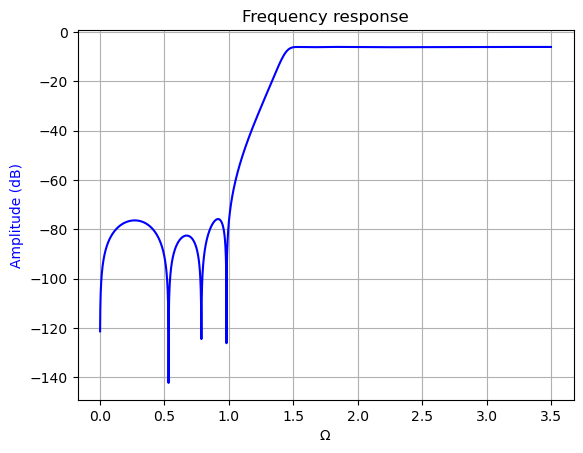

In [47]:
b = [ 3.818806557373933e-14, 0, 2.812265037878487e-12, 0
    , 6.214888994850808e-11, 0, 3.9666483675e-10,      0
    ]
a = [ 7.637613114747865e-14, 3.236871580035126e-12
    , 7.239829639984413e-11, 1.141633363899595e-9
    , 1.203699210554901e-8,  1.081488955891856e-7
    , 5.319207628865157e-7,  2.8477914703875e-6
    ]
w, h = signal.freqs (b, a, np.arange (0, np.pi*7, np.pi/512))
plot_response (w, h, fs = 1)


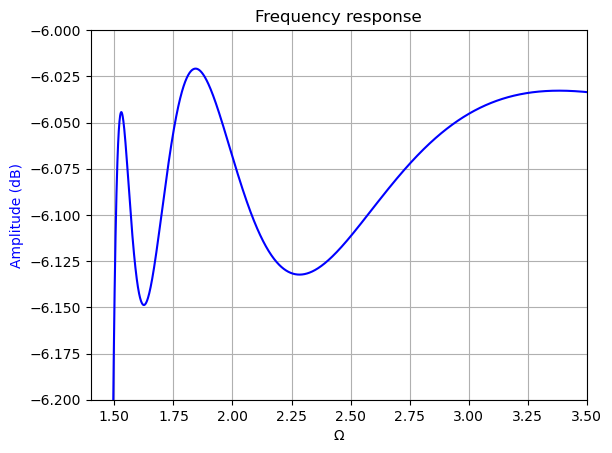

In [48]:
plot_response (w, h, fs=1, xmin =1.4, xmax=3.5, ymin=-6.2, ymax=-6)